# Image Recognition

(live long, prosper, and watch out for cats)

![cat detectors rule](assets/image/meme.jpg)

(image: https://towardsdatascience.com/the-whos-who-of-machine-learning-and-why-you-should-know-them-9cefbbc84f07)

# Topics

- Image Recognition Tasks
- Convolutional Neural Networks
- Image Classification
- Object Detection
- Instance Segmentation

# Image Recognition Tasks
![cat detectors](assets/image/cat_detectors.png)

(image: analyticsindiamag.com)

## Input Image Tensor

- 3 channels: 'rgb'
- rows: image height
- columns: image width

Ordering:
- Channels-first: channel, rows, columns
- Channels-last: rows, columns, channels

## Walkthrough - Input Images

In this walkthrough, we will read an image from file and examine the data.

### Setup

Install the Python image library:
```
conda install pillow
```

channel ordering: RGB


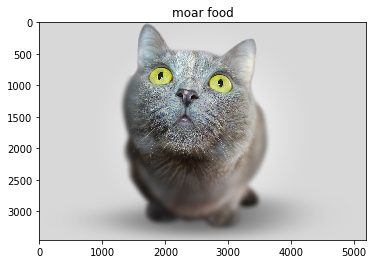

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# read an image file
demo = Image.open('assets/image/cat.jpg') # source: pxhere.com/en/photo/1337399

# check whether this is RGB or BGR
# so that we can input the images correctly to our neural network
print('channel ordering:', demo.mode)

# display the image
plt.imshow(demo)
plt.title('moar food')
plt.show()

In [146]:
# examine the numpy array
demo_arr = np.array(demo)

print('shape:', demo_arr.shape)
print('data type:', demo_arr.dtype)
print('rank:', demo_arr.ndim)

shape: (3456, 5184, 3)
data type: uint8
rank: 3


In [147]:
# since the sides of the picture are the same boring color
# inspect the (roughly) middle 5 rows and columns
midpoint_row = int(demo_arr.shape[0] / 2)
midpoint_col = int(demo_arr.shape[1] / 2)

demo_arr[midpoint_row:midpoint_row+5, midpoint_col:midpoint_col+5, :]

array([[[ 49,  32,  40],
        [ 87,  72,  79],
        [115,  99, 109],
        [109,  96, 106],
        [ 72,  62,  71]],

       [[ 77,  60,  66],
        [ 97,  82,  87],
        [115, 100, 107],
        [105,  92,  99],
        [ 71,  61,  69]],

       [[ 95,  80,  85],
        [ 95,  80,  85],
        [108,  96, 100],
        [108,  97, 101],
        [ 82,  73,  76]],

       [[ 95,  79,  89],
        [ 95,  79,  89],
        [113, 100, 107],
        [122, 111, 115],
        [108,  99, 100]],

       [[ 87,  73,  90],
        [ 98,  84,  99],
        [116, 104, 114],
        [125, 115, 123],
        [128, 119, 122]]], dtype=uint8)

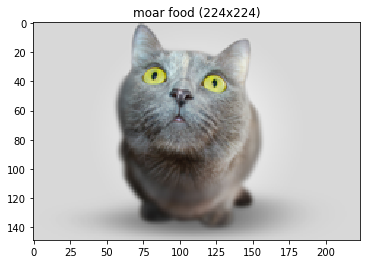

In [148]:
# resize the image to 224 by 224
demo.thumbnail((224, 224), resample=Image.BICUBIC)

# display the image
plt.imshow(demo, interpolation='nearest')
plt.title('moar food (224x224)')
plt.show()

In [149]:
# examine the numpy array again
demo_arr = np.array(demo)

print(demo_arr.shape)
print(demo_arr.dtype)

# notice the difference in values from previously
midpoint_row = int(demo_arr.shape[0] / 2)
midpoint_col = int(demo_arr.shape[1] / 2)
demo_arr[midpoint_row:midpoint_row+5, midpoint_col:midpoint_col+5, :]

(149, 224, 3)
uint8


array([[[107, 104, 103],
        [118, 119, 119],
        [119, 117, 117],
        [110, 106, 103],
        [ 94,  89,  87]],

       [[105, 101,  99],
        [106, 102, 101],
        [111, 110, 108],
        [112, 106, 105],
        [116, 111, 109]],

       [[105,  99,  97],
        [112, 108, 105],
        [104,  98,  98],
        [111, 105, 104],
        [133, 128, 125]],

       [[107,  96,  94],
        [108, 100,  97],
        [ 96,  86,  82],
        [103,  93,  91],
        [120, 110, 107]],

       [[101,  92,  85],
        [107,  96,  88],
        [100,  89,  84],
        [104,  92,  87],
        [107,  95,  88]]], dtype=uint8)

A histogram is sometimes helpful to visualize the colour distribution of a given channel

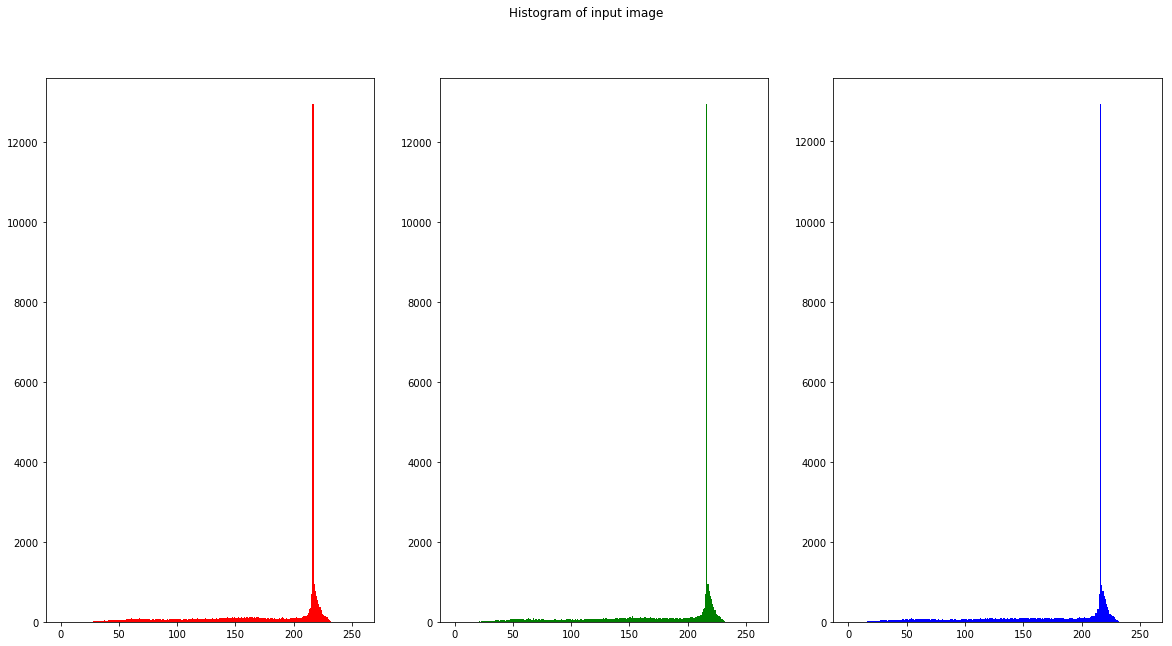

In [150]:
# order: RGB
red_channel = demo_arr[:, :, 0]
green_channel = demo_arr[:, :, 1]
blue_channel = demo_arr[:, :, 2]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

# flatten the [row_size, col_size] matrix into a vector of [row_size * col_size]
# we just need to count the raw pixel values for the histogram,
# so it doesn't matter where they are located.
ax[0].hist(red_channel.flatten(), 256, range=(0,256), color='red')
ax[1].hist(green_channel.flatten(), 256, range=(0,256), color='green')
ax[2].hist(blue_channel.flatten(), 256, range=(0,256), color='blue')

fig.suptitle('Histogram of input image')
plt.show()

## Output

- Image Classification: labels
- Object Detection: labels + bounding boxes
- Instance Segmentation: labels + boundaries

## Problem: many input features $\rightarrow$ many parameters

224 x 224 pixel colour image: 224 x 224 x 3 = 150528 features

Dimensionality reduction may help, but there's a better way....

## Convolution

- Reduces parameter space
- Looks at localized, spatial information

![cnn](assets/image/cnn.png)

(image: [leonardoaraujosantos.gitbooks.io](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html))

## Convolution - Feature Extraction
![no_padding_no_strides](assets/image/no_padding_no_strides.gif)
Input: blue boxes, Result: green boxes

(image: [leonardoaraujosantos.gitbooks.io](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html))

## Convolution - Hyperparmeters

- Filter Size / Kernel Size: the window size to perform the operation (e.g. 3x3)
- Stride: how much to slide the window each time (e.g. 1)

Units:
- 1 unit: 1 element in the tensor
- For images, it will be the pixel values

## Padding - Controls Output Size

![same_padding_no_strides](assets/image/same_padding_no_strides.gif)
Input: blue boxes, Result: green boxes

(image: [leonardoaraujosantos.gitbooks.io](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html))

## Padding - Hyperparameters

- Padding width: how much padding to add to the "edges"
- Padding type: what values to use as padding (e.g. 0)

## Convolution - Kernel

- the operation performed on the input window (the filter)
- to transform into the output values

## Walkthrough - Convolution

In this walkthrough, we will convolve our demo image with a kernel that performs edge detection.

Credits: http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

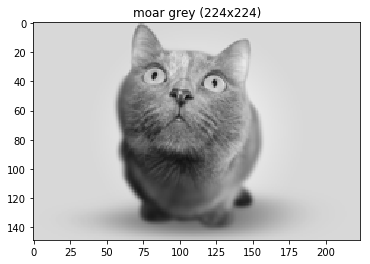

In [161]:
# convert our input image to greyscale (1 channel)
demo_grey = demo.convert(mode='L')

plt.imshow(demo_grey, interpolation='nearest')
plt.title('moar grey (224x224)')
plt.show()

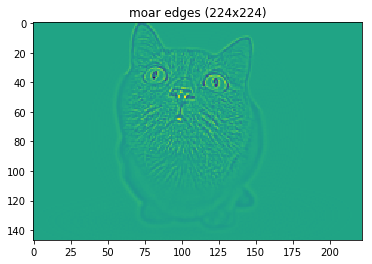

In [169]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
from scipy.signal import convolve2d

# edge-detection kernel
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

# we use 'valid' which means we do not add zero padding to our image
edges = convolve2d(demo_grey, kernel, mode='valid')

plt.imshow(edges)
plt.title('moar edges (224x224)')
plt.show()

## Non-linear Activation Functions

Just like a Neuron, the output of convolution is passed through a non-linear "activation" function

Examples:
- sigmoid
- tanh
- Rectified Linear Units, leaky ReLU, Parametric ReLU, Exponential Linear Units

## Pooling

## Regularization Layers

- Dropout
- Batch normalization

## Reading List

|Material|Read it for|URL
|--|--|--|
|Convolution - Artificial Intelligence|Introduction to convolution|https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolution.html|
|Convolutional Neural Networks - Artificial Intelligence|Introduction to convolutional neural networks|https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html|